In [1]:
import image_neighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from imutils import build_montages


File ../00_data/00_test_pic_full/.DS_Store is not readable.
File ../00_data/00_test_pic_full/.DS_Store is not readable.


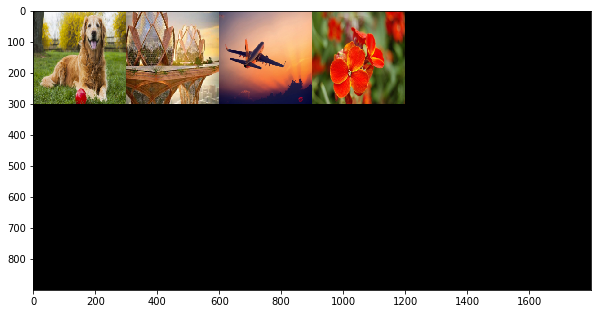

In [2]:
image_neighbors.mix_n_match_neighbors("../00_data/00_test_pic_full", "target_01", 3)

In [ ]:
valid_path, features, feature_list = image_neighbors.img_get_feature("../00_data/00_test_pic_full")

In [ ]:
feature_list 

In [ ]:
scaled_feature_list = image_neighbors.scale_feature(feature_list)
scaled_feature_list

In [ ]:
target_index = image_neighbors.find_target_image(valid_path, target_image = "target_01")

In [ ]:
list_of_neighbors = image_neighbors.find_neighbors(valid_path, features, scaled_feature_list, 6, target_index)

In [ ]:
list_of_neighbors

In [ ]:
image_neighbors.show_result_in_plot_knn(list_of_neighbors)

In [ ]:
def img_resize_plot(img, height = 220, width = 220): # it takes a image (as array) and resize it. 
    
    dim = (width, height)
    list_resize = []
    
    img_res = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    
    return img_res

def show_result_in_plot_knn(list_of_neighbors):

        images_plot = []
        
        for path in list_of_neighbors:
            img = mpimg.imread(path[0])
            img_res = img_resize_plot(img)
            images_plot.append(img_res)
            
            montages = build_montages(images_plot, (300,300), (6,3))
    
        for montage in montages:
            plt.figure(figsize=(10,10))
            imgplot = plt.imshow(montage)
            plt.show() 
        
        

In [ ]:
show_result_in_plot_knn(list_of_neighbors)